# Segurança em Redes de comunicação

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ipaddress
import dns.resolver
import dns.reversename
import pygeoip
import matplotlib.pyplot as plt

## Extraction of the datasets

There are 3 datasets:
- dataset3: contains the data of the comunications in one day without any anomalous behavior;
- teste3: contains the data of the comunications in one day with anomalous behavior;
- server3: contains the data from external sources;

The dataframe contains the following columns:
- index: the index of the row
- timestamp: the timestamp of the event
- src_ip: the source IP address
- dst_ip: the destination IP address
- proto: the protocol used
- port: the port used
- up_bytes: the number of bytes uploaded by the source
- down_bytes: the number of bytes downloaded by the source

In [34]:
dataframe = pd.read_parquet('datasets/dataset3/test3.parquet')
dataframe.head()

,timestamp,src_ip,dst_ip,proto,port,up_bytes,down_bytes
index,,,,,,,
174163,1488996,192.168.103.17,192.168.103.228,udp,53,210,611
174164,1489002,192.168.103.17,192.168.103.228,udp,53,204,580
174165,1489088,192.168.103.17,142.250.200.99,tcp,443,8967,57243
174166,1489284,192.168.103.17,142.250.200.99,tcp,443,4501,34854
174167,1489314,192.168.103.17,142.250.200.99,tcp,443,22478,178992


The packets are divided into two protocols: TCP and UDP. As we can see in the following plot, the number of TCP packets is higher than the number of UDP packets, with almost 90% of the packets being TCP packets.

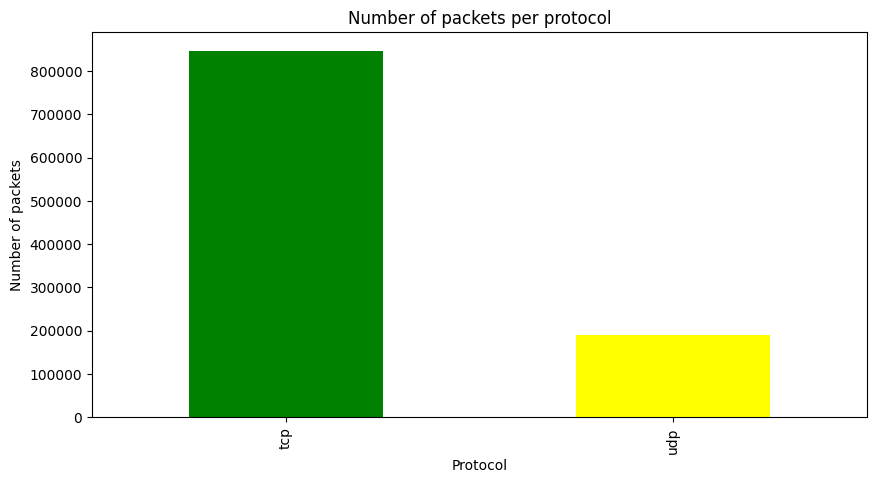

Ratio of TCP packets: 0.816915101702591
Ratio of UDP packets: 0.183084898297409


In [35]:
plt.figure(figsize=(10, 5))
dataframe['proto'].value_counts().plot(kind='bar', color=['green', 'yellow'])
plt.title('Number of packets per protocol')
plt.xlabel('Protocol')
plt.ylabel('Number of packets')
plt.show()

print('Ratio of TCP packets:', len(dataframe[dataframe['proto'] == 'tcp']) / len(dataframe))
print('Ratio of UDP packets:', len(dataframe[dataframe['proto'] == 'udp']) / len(dataframe))


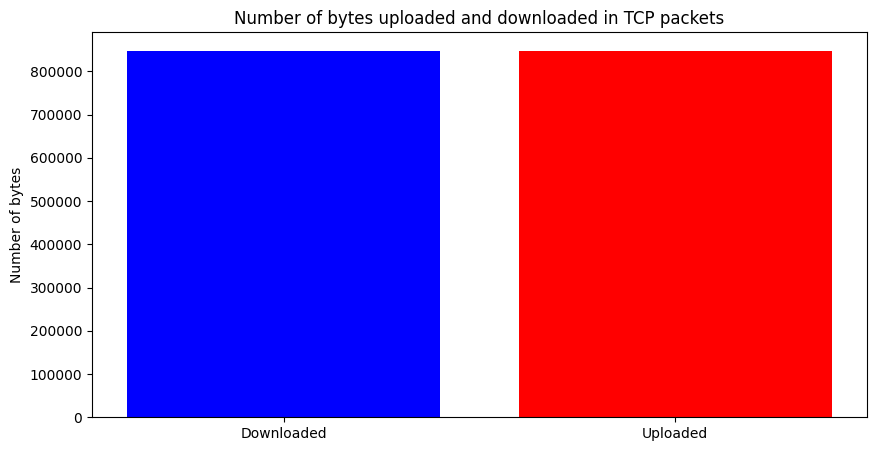

Ratio of downloaded bytes: 0.5
Ratio of uploaded bytes: 0.5


In [36]:
# Plot the downloads and uploads in TCP packets

downloaded = dataframe[dataframe['proto'] == 'tcp']['down_bytes'].count()
uploaded = dataframe[dataframe['proto'] == 'tcp']['up_bytes'].count()

plt.figure(figsize=(10, 5))
plt.bar(['Downloaded', 'Uploaded'], [downloaded, uploaded], color=['blue', 'red'])
plt.title('Number of bytes uploaded and downloaded in TCP packets')
plt.ylabel('Number of bytes')
plt.show()

print('Ratio of downloaded bytes:', downloaded / (downloaded + uploaded))
print('Ratio of uploaded bytes:', uploaded / (downloaded + uploaded))